# The curse of dimensionality

In machine learning, high-dimensional data refers to data with a large number of features or variables. The curse of dimensionality is a common problem in machine learning, where -

    1. The performance of the model deteriorates as the number of features increases.
    2. Complexity of the model increases with the number of features.
    3. High-dimensional data can also lead to overfitting.

# Two main approaches to dimensionality reduction: 

    1. Feature Selection: selecting a subset of the original features that are most relevant to the problem at hand.
    
    2. Feature Extraction: creating new features by combining or transforming the original features. 


# 1. Feature Selection:-
    
    It uses scoring or statistical methods to select which features to keep and which features to delete.
    There are mainly two types of Feature Selection techniques, which are:-
        1. Supervised Feature Selection technique - It consider the target variable and can be used for the 
                                                    labelled dataset.
        2. Unsupervised Feature Selection technique - It ignore the target variable and can be used for the 
                                                      unlabelled dataset.
    
    Supervised Feature Selection technique involves three ways:-
    
        1. Filter : The dataset is filtered, and a subset that contains only the relevant features is taken.
                    Some common techniques of filters method are -
                        a) Correlation - determine the relationship between the numerical variables.
                        b) Chi-Square Test - determine the relationship between the categorical variables.
                        c) ANOVA
                        d) Information Gain - determines the reduction in entropy 
                        e) Missing value ratio - The variable having more than the threshold missing value can be dropped.
                        f) Fisher's score - returns the rank of the variable on the fisher's criteria in descending order.
                        g) Variance Threshold.
            
        2. Wrapper - In this method, some features are fed to the ML model, and evaluate the performance and decides 
                     whether to add those features or remove to increase the accuracy of the model. 
                     A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria.
                     Some common techniques of wrapper methods are:
                         a) Forward Selection
                         b) Backward Selection - OLS method then finding features p>0.05 for dropping.
                         c) Bi-directional Elimination
                         d) Recursive feature elimination,SelectFromModel,SquentialFeatureSelector
                         e) Exhaustive feature elimination
                         
        3. Embedded - Embedded methods are iterative in a sense that takes care of each iteration of the model 
                      training process and carefully extract those features which contribute the most to the training 
                      for a particular iteration.
                      Some common techniques of Embedded methods are:
                          a) LASSO - If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0.
                                     Hence the features with coefficient = 0 are removed and the rest are taken.
                          b) Elastic Net
                          c) Ridge Regression
                          d) Random forest importance
                          
 # https://scikit-learn.org/stable/modules/feature_selection.html
 
 

# Other Techniques -
 
 1. Removing features with low variance :
         1. VarianceThreshold : It is a simple baseline approach to feature selection. 
                                It removes all features whose variance doesn’t meet some threshold. 
                                By default, it removes all zero-variance features, 
                                i.e. features that have the same value in all samples.
                                It is a feature selector that removes all the low variance features from 
                                the dataset that are of no great use in modeling.
                                Variance Threshold can work only upon numerical data.
                                So Using Encoder is Required Before Thresholding.
                                Threshold=Variance of features :
                                


![image.png](attachment:image.png)


2


3. Recursive feature elimination : First, the estimator is trained on the initial set of features and 
                                   the importance of each feature is obtained either through any specific attribute 
                                   (such as coef_, feature_importances_). 
                                   Then, the least important features are pruned from current set of features. 
                                   That procedure is recursively repeated on the pruned set until the desired number 
                                   of features to select is eventually reached.
                                   model.support_ or model.ranking_ used to get features selected.
                                   Here no. of features are given to select.
                                   
4. SelectFrom Model : Estimator assigns importance to each feature through a specific attribute 
                      (such as coef_, feature_importances_).
                      The features are considered unimportant and removed if the corresponding importance of the feature
                      values are below the provided threshold parameter.
                      In combination with the threshold criteria, one can use the max_features parameter to set a limit
                      on the number of features to select.
                      model.get_support() used to get selected features.
                      
5. Sequential Feature Selection : SFS can be either forward or backward
                                  The direction parameter controls whether forward or backward SFS is used.
                                  forward and backward selection do not yield equivalent results. 
                                  one may be much faster than the other depending on the requested number of selected 
                                  features: if we have 10 features and ask for 7 selected features, forward selection 
                                  would need to perform 7 iterations while backward selection would only need to perform 3.
                                  a) Forward-SFS is a greedy procedure that iteratively finds the best new feature to 
                                  add to the set of selected features. 
                                  Concretely, we initially start with zero features and find the one feature that maximizes
                                  a cross-validated score when an estimator is trained on this single feature. 
                                  Once that first feature is selected, we repeat the procedure by adding a new feature to 
                                  the set of selected features. 
                                  The procedure stops when the desired number of selected features is reached, as determined
                                  by the n_features_to_select parameter.
                                  b)Backward-SFS follows the same idea but works in the opposite direction.
                                  instead of starting with no features and greedily adding features, we start with all the
                                  features and greedily remove features from the set. 
                                  

# How to choose a Feature Selection Method?
 Input Variable	  Output Variable	     Feature Selection technique
    
    Numerical	Numerical	           Pearson's correlation coefficient (For linear Correlation)-df.corr()
                                       Spearman's rank coefficient (for non-linear correlation)-df.corr(method='spearman')
    
    Numerical	Categorical	           ANOVA correlation coefficient (linear).
                                       Kendall's rank coefficient (nonlinear)-df.corr(method='kendall')
   
    Categorical	 Numerical	           Kendall's rank coefficient (linear).
                                       ANOVA correlation coefficient (nonlinear).

    Categorical	Categorical	           Chi-Squared test (contingency tables).
                                       Mutual Information.

# 2.  Feature Extraction:-

    Methods used for dimensionality reduction include:-
    
# **i) matrix decomposition algorithms for dimensionality reduction:**
    
        1. Principal Component Analysis (PCA) -
            a)It is an unsupervised learning algorithm(uses data to identify attributes that account for the most variance).
            b)It uses Variance and Covariance,Eigenvalues and Eigen factors to find Principal components.
            c)Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower
              dimensional space while preserve most of the explained variance at the same time. 
            d)The input data is centered but not scaled for each feature before applying the SVD.
            e)svd_solver :
                    1> 'full' :run exact full SVD, calling the standard LAPACK solver.
                    2> 'arpack' : run SVD truncated to n_components calling ARPACK solver. 
                    3> 'randomized' : run randomized SVD by the method of Halko et al.
            f)PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain
              a maximum amount of the variance.
            g)The optional parameter - whiten=True - makes it possible to project the data onto the singular space while
              scaling each component to unit variance.
            h)The biggest limitation is that PCA only supports batch processing, which means all of the data to be 
              processed must fit in main memory.
              
        2. IncrementalPCA : 
            a)The PCA object is very useful, but has certain limitations for large datasets. 
            b)The biggest limitation is that PCA only supports batch processing, which means all of the data to be 
              processed must fit in main memory. 
            c)The IncrementalPCA object uses a different form of processing and allows for partial computations which 
              almost exactly match the results of PCA while processing the data in a minibatch fashion.
            d)IncrementalPCA only stores estimates of component and noise variances, in order update 
              explained_variance_ratio_ incrementally. 
              This is why memory usage depends on the number of samples per batch, rather than the number of samples
              to be processed in the dataset.
            
        3. SparsePCA :
            a)Principal component analysis (PCA) has the disadvantage that the components extracted by this method 
              have exclusively dense expressions, i.e. they have non-zero coefficients when expressed as linear 
              combinations of the original variables. 
              This can make interpretation difficult.
            b)SparsePCA is a variant of PCA, with the goal of extracting the set of sparse components that best 
              reconstruct the data.
            c)It yields a more interpretable representation, clearly emphasizing which of the original features 
              contribute to the differences between samples.
            
        4. Kernel PCA (kPCA) :
            a)KernelPCA is an extension of PCA which achieves non-linear dimensionality reduction through the use 
              of kernels - For Non  linear data.
            b)While in PCA the number of components is bounded by the number of features, in KernelPCA the number of 
              components is bounded by the number of samples.
              
        5. TruncatedSVD :
            a)It performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 
            b)Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. 
            c)This means it can work with sparse matrices efficiently.
            d)TruncatedSVD implements a variant of singular value decomposition (SVD) that only computes the k
              largest singular values, where k is a user-specified parameter.
            e)In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in 
              sklearn.feature_extraction.text. 
            g)In that context, it is known as latent semantic analysis (LSA) because it transforms such matrices to 
              a “semantic” space of low dimensionality.
            h)LSA is known to combat the effects of synonymy and polysemy (both of which roughly mean there are
              multiple meanings per word), which cause term-document matrices to be overly sparse and exhibit poor 
              similarity under measures such as cosine similarity.
              
         6. FastICA :
             a)Independent component analysis separates a multivariate signal into additive subcomponents that are 
               maximally independent. 
               It is implemented in scikit-learn using the Fast ICA algorithm. 
             b)ICA is not used for reducing dimensionality but for separating superimposed signals. 
             c)Since the ICA model does not include a noise term, for the model to be correct, whitening must 
               be applied.
             d)It is classically used to separate mixed signals (a problem known as blind source separation),
            
 
# **ii)Dimensionality reduction using LDA & QDA :**
        
        1. Linear Discriminant Analysis (LDA) - 
            a)LDA is a supervised algorithm classifier(uses target classes to identify attributes that account for 
              the most variance).
              It is projecting the input data to a linear subspace consisting of the directions which maximize the 
              separation between classes.
              The dimension of the output is necessarily less than the number of classes, so this is in general a rather 
              strong dimensionality reduction, and only makes sense in a multiclass setting.
              This is implemented in the transform method.
              It is a classifier with a linear decision boundary, generated by fitting class conditional densities to 
              the data and using Bayes’ rule.
              The fitted model can also be used to reduce the dimensionality of the input by projecting it to the 
              most discriminative directions, using the transform method.
            b)It is also known as Normal Discriminant Analysis (NDA) or Discriminant Function Analysis (DFA). 
            c)It transform a 2-D and 3-D graph into a 1-dimensional plane by -
                - maximizing the distance between means of two classes.
                - minimizing the variance within the individual class.
            d)LDA is a special case of QDA, where the Gaussians for each class are assumed to share the same covariance
              matrix.
            e)It is derived from simple probabilistic models, which model the class conditional distribution of the 
              data for each class and Predictions can then be obtained by using Bayes’ rule.
              We can thus interpret LDA as assigning to the class whose mean is the closest in terms of Mahalanobis 
              distance, while also accounting for the class prior probabilities.
            f)LDA has a linear decision surface.
            g)Estimation algorithms :  ‘svd’: Singular value decomposition (default)
                                       ‘lsqr’: Least squares solution. 
                                       ‘eigen’: Eigenvalue decomposition.
            
        2. Quadratic Discriminant Analysis (QDA) :
            a)QDA is a supervised algorithm(uses target classes to identify attributes that account for the most variance).
            b)It is a classifier with a quadratic decision boundary, generated by fitting class conditional densities to 
              the data and using Bayes’ rule.
            c)Estimation algorithms : The ‘svd’ solver
            d)The model fits a Gaussian density to each class.
         
        

# Can or Cannot PCA + linear regression work and why?

No, PCA and Linear Regression are not the same thing. PCA returns mixtures of (typically dependent) variables that most contribute to observed variance.
 
Linear regression does not mix variables, while expressing the output variable as linear combinations of the input variables.

This is the problem of multicollinearity, which if occurs in regression is a problem for the researcher, but if occurs in PCA only improves the validity of estimation of separate components and the loadings of the items on such (latent) constructs.

PCA is computed by singular value decomposition. Linear regression is not. 
Consequences: linear regression misbehaves if two or more input variables are correlated and are sensitively dependent on noise. PCA merges the (almost) indistinguishable(correlated) variables together and continues giving sane results. This merging of strongly correlated variables can result in reduction in the apparent dimensionality of the system, generally improving explanatory power and prediction.

# Principal Component Regression :

But, The process of using PCA for linear regression is called Principal Component Regression.
In PCR, instead of regressing the dependent variable on the explanatory variables directly, the principal components of the explanatory variables are used as regressors. 

# Principal Component Regression vs Partial Least Squares Regression:

# PCR :

PCR is a regressor composed of two steps: 
        first, PCA is applied to the training data, possibly performing dimensionality reduction; 
        then, a regressor (e.g. a linear regressor) is trained on the transformed samples. 
        
In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. 

As a result, PCR may perform poorly in some datasets where the target is strongly correlated with directions that have low variance. 

Indeed, the dimensionality reduction of PCA projects the data into a lower dimensional space (using SVD) where the variance of the projected data is greedily maximized along each axis.(high variance components are kept and low variance components are dropped.)

Despite them having the most predictive power on the target, the directions with a lower variance will be dropped, and the final regressor will not be able to leverage them and results in the projected data having a low predictive power on the target.

# PLS:

PLS is both a transformer and a regressor, and it is quite similar to PCR.

it also applies a dimensionality reduction to the samples before applying a linear regressor to the transformed data. The main difference with PCR is that the PLS transformation is supervised.

the PLS regressor manages to capture the effect of the direction with the lowest variance, thanks to its use of target information during the transformation: it can recognize that this direction is actually the most predictive.
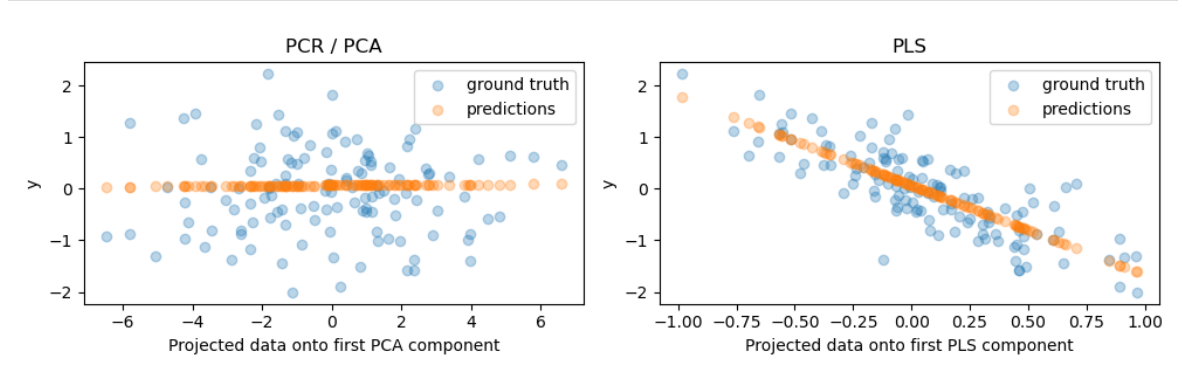

# Features of PCR :

    1. PCR reduces the dimensionality of a dataset by projecting it onto a lower-dimensional subspace, using a set 
       of orthogonal linear combinations of the original variables called principal components.
    
    2. PCR is often used as an alternative to multiple linear regression, especially when the number of variables is 
       large or when the variables are correlated.

    3. By using PCR, we can reduce the number of variables in the model and improve the interpretability and 
       stability of the regression results.
       
    4. To perform PCR, we first need to standardize the original variables and then compute the principal components 
       using singular value decomposition (SVD) or eigendecomposition of the covariance matrix of the standardized data.

    5. The principal components are then used as predictors in a linear regression model, whose coefficients can be 
       estimated using least squares regression.